In [4]:
%run ../algorithmeX.ipynb

## Polyominos

In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'

In [50]:
class PIECE:

    # une piece est un ensemble (frozenset) de couples
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(x for x,_ in self.piece) + 1
        self.hauteur = max(y for _,y in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_x = min(x for x,_ in piece)
        min_y = min(y for _,y in piece)
        return frozenset((x - min_x, y - min_y) for x, y in piece)

    def transposee(self):
        return PIECE(self.nom, frozenset((x, -y) for x, y in self.piece))

    def rotation(self):
        return PIECE(self.nom, frozenset((-y, x) for x, y in self.piece))

    def isometriquesPlus(self):
        l = [self]
        for _ in range(3):
            p = l[-1].rotation()
            l.append(p)
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesPlus()
        l2 = self.transposee().isometriquesPlus()
        return(list(set(l1 + l2)))
    
    def carre():
         r = .5
         return ((r, -r, -r, r), (r, r, -r, -r))
    
    def plotCarre(ax,i,j,**kwargs):
        X, Y = PIECE.carre()
        ax.fill(list(map(lambda u: i + u, X)), list(map(lambda v: j + v, Y)), **kwargs)

    def polygoneOfCouples(e):
        """e est un ensemble de couples d'entiers (i,j)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        X, Y = PIECE.carre()
        segments = set()
        for i, j in e:
            if (i + 1, j) not in e: segments.add(((i + X[3], i + X[0]),(j + Y[3],j + Y[0])))
            if (i, j + 1) not in e: segments.add(((i + X[0], i + X[1]),(j + Y[0],j + Y[1])))
            if (i - 1, j) not in e: segments.add(((i + X[1], i + X[2]),(j + Y[1],j + Y[2])))
            if (i, j - 1) not in e: segments.add(((i + X[2], i + X[3]),(j + Y[2],j + Y[3])))    
        return segments
    
    def plotPolyomino(ax, e, couleur):
        for s in PIECE.polygoneOfCouples(e):
            ax.plot(*s, linewidth = 1, color = 'black')
        for i, j in e:
            PIECE.plotCarre(ax, i, j,  facecolor = couleur, edgecolor='black', linewidth=0.)
        
    def plot(self):
        fig = plt.figure(facecolor='w', 
                         figsize = (self.largeur / 4.+.01, self.hauteur / 4.))
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyomino(ax, self.piece, c)

In [51]:
#------------------------------- pentominos ----------------------------

F = PIECE('F', frozenset([(0,0), (0,1), (-1,1), (0,2), (1,2)]), couleur = 'skyblue')
I = PIECE('I', frozenset([(0,0), (0,1), (0,2), (0,3), (0,4)]), couleur = 'orange')
L = PIECE('L', frozenset([(0,0), (1,0), (0,1), (0,2), (0,3)]), couleur = 'aliceblue')
N = PIECE('N', frozenset([(0,0), (0,1), (1,1), (1,2), (1,3)]), couleur = 'plum')
P = PIECE('P', frozenset([(0,0), (0,1), (1,1), (0,2), (1,2)]), couleur = 'darkturquoise')
T = PIECE('T', frozenset([(0,0), (0,1), (0,2), (-1,2), (1,2)]), couleur = 'aquamarine')
U = PIECE('U', frozenset([(0,0), (1,0), (2,0), (0,1), (2,1)]), couleur = 'lightpink')
V = PIECE('V', frozenset([(0,0), (1,0), (2,0), (2,1), (2,2)]), couleur = 'paleturquoise')
W = PIECE('W', frozenset([(0,0), (1,0), (1,1), (2,1), (2,2)]), couleur = 'beige')
X = PIECE('X', frozenset([(1,0), (1,1), (0,1), (2,1), (1,2)]), couleur = 'cadetblue')
Y = PIECE('Y', frozenset([(1,0), (1,1), (1,2), (0,2), (1,3)]), couleur = 'cornflowerblue')
Z = PIECE('Z', frozenset([(1,0), (2,0), (1,1), (1,2), (0,2)]), couleur = 'cornsilk')

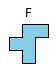

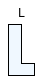

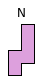

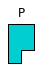

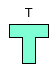

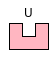

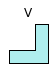

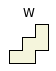

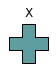

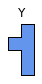

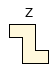

In [52]:
for p in [F,I,L,N,P,T,U,V,W,X,Y,Z]: p.plot()

In [63]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (couples d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc):
                            ligne.append((ic,jc))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):
                
        if not self.strict: 
            from random import random
            def r():
                return .6 + .4 * random())
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = (r(),r(),r())
            PIECE.plotPolyomino(ax, e, couleur)

SyntaxError: unmatched ')' (1721018888.py, line 65)

### Exemple 1

['F', (1, 3), (2, 4), (2, 3), (3, 4), (2, 2)]
['P', (2, 7), (2, 6), (3, 7), (4, 6), (3, 6)]
['Y', (6, 3), (7, 4), (7, 3), (7, 2), (7, 5)]
['I', (8, 2), (8, 5), (8, 1), (8, 4), (8, 3)]
['Z', (4, 3), (4, 2), (5, 1), (3, 3), (4, 1)]
['T', (1, 5), (3, 5), (1, 4), (2, 5), (1, 6)]
['N', (6, 5), (7, 6), (6, 4), (6, 6), (7, 7)]
['L', (1, 8), (3, 8), (1, 7), (4, 8), (2, 8)]
['U', (1, 2), (3, 2), (1, 1), (3, 1), (2, 1)]
['V', (7, 8), (8, 7), (8, 6), (6, 8), (8, 8)]
['X', (4, 7), (5, 8), (6, 7), (5, 7), (5, 6)]
['W', (5, 2), (6, 2), (7, 1), (5, 3), (6, 1)]


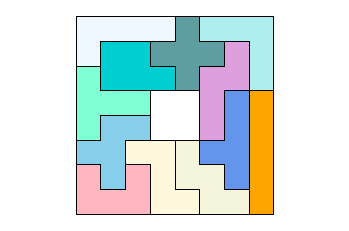

In [64]:
# 65 solutions

pentominos = [F]
for p in [I,L,N,P,T,U,V,W,X,Y,Z]: pentominos += p.isometriques()

puzzle = PUZZLE(pentominos,1,8,1,8,
                conditions = (lambda i,j: not (4 <= i <= 5 and 4 <= j <= 5)))
    
s = puzzle.solve()
        
sol = next(s)
puzzle.plotSolution(sol)
puzzle.printSolution(sol)


### Exemple 2

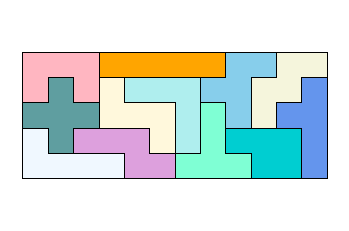

In [65]:
# 1010 solutions

#from puzzle import * # commenter si notebook

pentominos = [F,F.rotation()]
for p in [I,L,N,P,T,U,V,W,X,Y,Z]: pentominos += p.isometriques()

puzzle = PUZZLE(pentominos,1,12,1,5)
    
s = puzzle.solve()
        
sol = next(s)
puzzle.plotSolution(sol)
#puzzle.printSolution(sol)


### Exemple 3

In [66]:
def unePiece(piece):
    puzzle = PUZZLE(piece.isometriques(),1,15,1,15,strict = False)    
    s = puzzle.solve()
    sol = next(s)
    puzzle.plotSolution(sol)

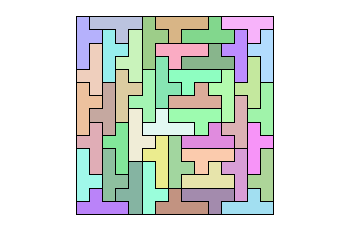

In [67]:
# 8 x 212 = 1696 solutions
unePiece(Y)